<a href="https://colab.research.google.com/github/alifftwa/Dataset-Daun-Jeruk-Nipis-dan-Daun-Kemangi_100_102/blob/main/Uts_Kecerdasan_Buatan_Luthfi_Rizzaludin_(100)_dan_Alif_Fatwa_Ramadhani_(102).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/gdrive/My Drive/Colab Notebooks/Coba

[Errno 107] Transport endpoint is not connected: '/content/gdrive/My Drive/Colab Notebooks/Coba'
/content


In [ ]:
import os



train_dir = "/content/drive/My Drive/Colab Notebooks/Coba/train"
val_dir = "/content/drive/My Drive/Colab Notebooks/Coba/test"

jeruk_train_path = train_dir +'/Daun Jeruk'
kemangi_train_path = train_dir +'/Daun Kemangi'
jeruk_val_path = val_dir +'/Daun Jeruk'
kemangi_val_path = val_dir +'/Daun Kemangi'

jeruk_len_train = len(os.listdir(jeruk_train_path))
kemangi_len_train = len(os.listdir(kemangi_train_path))
jeruk_len_val = len(os.listdir(jeruk_val_path))
kemangi_len_val = len(os.listdir(kemangi_val_path))

print("jumlah dataset Training : ", jeruk_len_train + jeruk_len_train)
print("jumlah dataset validasi : ", jeruk_len_val + jeruk_len_val)
print("\n\n")
print("jumlah train kelas jeruk : ", jeruk_len_train)
print("jumlah train kelas kemangi : ", kemangi_len_train)
print("jumlah validasi kelas jeruk : ", jeruk_len_val)
print("jumlah validasi kelas kemangi : ", kemangi_len_val)

jumlah dataset Training :  100
jumlah dataset validasi :  100



jumlah train kelas jeruk :  50
jumlah train kelas kemangi :  50
jumlah validasi kelas jeruk :  50
jumlah validasi kelas kemangi :  50


In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(50, 50),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(50, 50),
        batch_size=20,
        class_mode='binary')

Found 100 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, AveragePooling2D, Flatten, GlobalAveragePooling2D, Dropout

In [ ]:
model = Sequential()

model.add(InputLayer(input_shape=[50, 50,3]))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(AveragePooling2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(AveragePooling2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(AveragePooling2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(AveragePooling2D(pool_size=2, padding='same'))
model.add(GlobalAveragePooling2D())
model.add(Flatten())
model.add(Dropout(0.0001))

In [ ]:

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.0001))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.0001))
model.add(Dense(1, activation='sigmoid'))

In [ ]:

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 64)        1792      
                                                                 
 average_pooling2d (AverageP  (None, 25, 25, 64)       0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 128)       73856     
                                                                 
 average_pooling2d_1 (Averag  (None, 13, 13, 128)      0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 256)       295168    
                                                                 
 average_pooling2d_2 (Averag  (None, 7, 7, 256)        0

In [ ]:

from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(lr=0.0001), 
              loss='binary_crossentropy', 
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:

callbacks = EarlyStopping(monitor='val_loss', patience=30, verbose=1, mode='auto')        
directory_to_save_best_model_file = '/content/drive/My Drive/Colab Notebooks/coba/coba.h5'
best_model = ModelCheckpoint(directory_to_save_best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=5,  
      epochs=100,
      validation_data=validation_generator,
      validation_steps=5,  
      
      callbacks = [callbacks, best_model])

Epoch 1/100
5/5 [==============================] - ETA: 0s - loss: 0.6845 - acc: 0.5000
Epoch 1: val_acc improved from -inf to 0.50000, saving model to /content/drive/My Drive/Colab Notebooks/coba/coba.h5
5/5 [==============================] - 56s 10s/step - loss: 0.6845 - acc: 0.5000 - val_loss: 0.6803 - val_acc: 0.5000
Epoch 2/100
5/5 [==============================] - ETA: 0s - loss: 0.6773 - acc: 0.5000
Epoch 2: val_acc did not improve from 0.50000
5/5 [==============================] - 9s 2s/step - loss: 0.6773 - acc: 0.5000 - val_loss: 0.6753 - val_acc: 0.5000
Epoch 3/100
5/5 [==============================] - ETA: 0s - loss: 0.6742 - acc: 0.5000
Epoch 3: val_acc did not improve from 0.50000
5/5 [==============================] - 9s 2s/step - loss: 0.6742 - acc: 0.5000 - val_loss: 0.6699 - val_acc: 0.5000
Epoch 4/100
5/5 [==============================] - ETA: 0s - loss: 0.6682 - acc: 0.5000
Epoch 4: val_acc did not improve from 0.50000
5/5 [==============================] - 9s 2

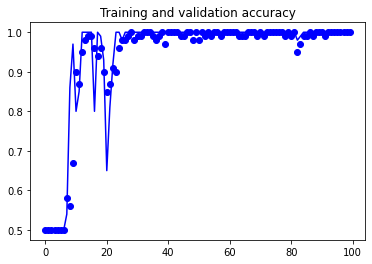

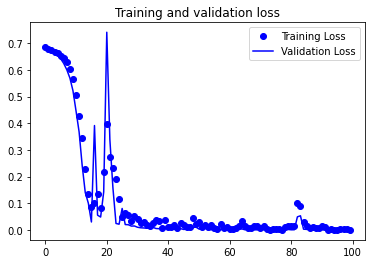

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# import some of library that we need to look the confusion matrix, recall, f1_score, and accuracy score to look how much your model is well
import numpy as np 
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, recall_score, accuracy_score
from sklearn.metrics import precision_score, confusion_matrix, classification_report
from sklearn import metrics

import seaborn as sns
sns.set(style='whitegrid')

Found 100 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.


Accuracy  : 1.0
Precision : 1.0
f1Score : 1.0
[[50  0]
 [ 0 50]]


ValueError: ignored

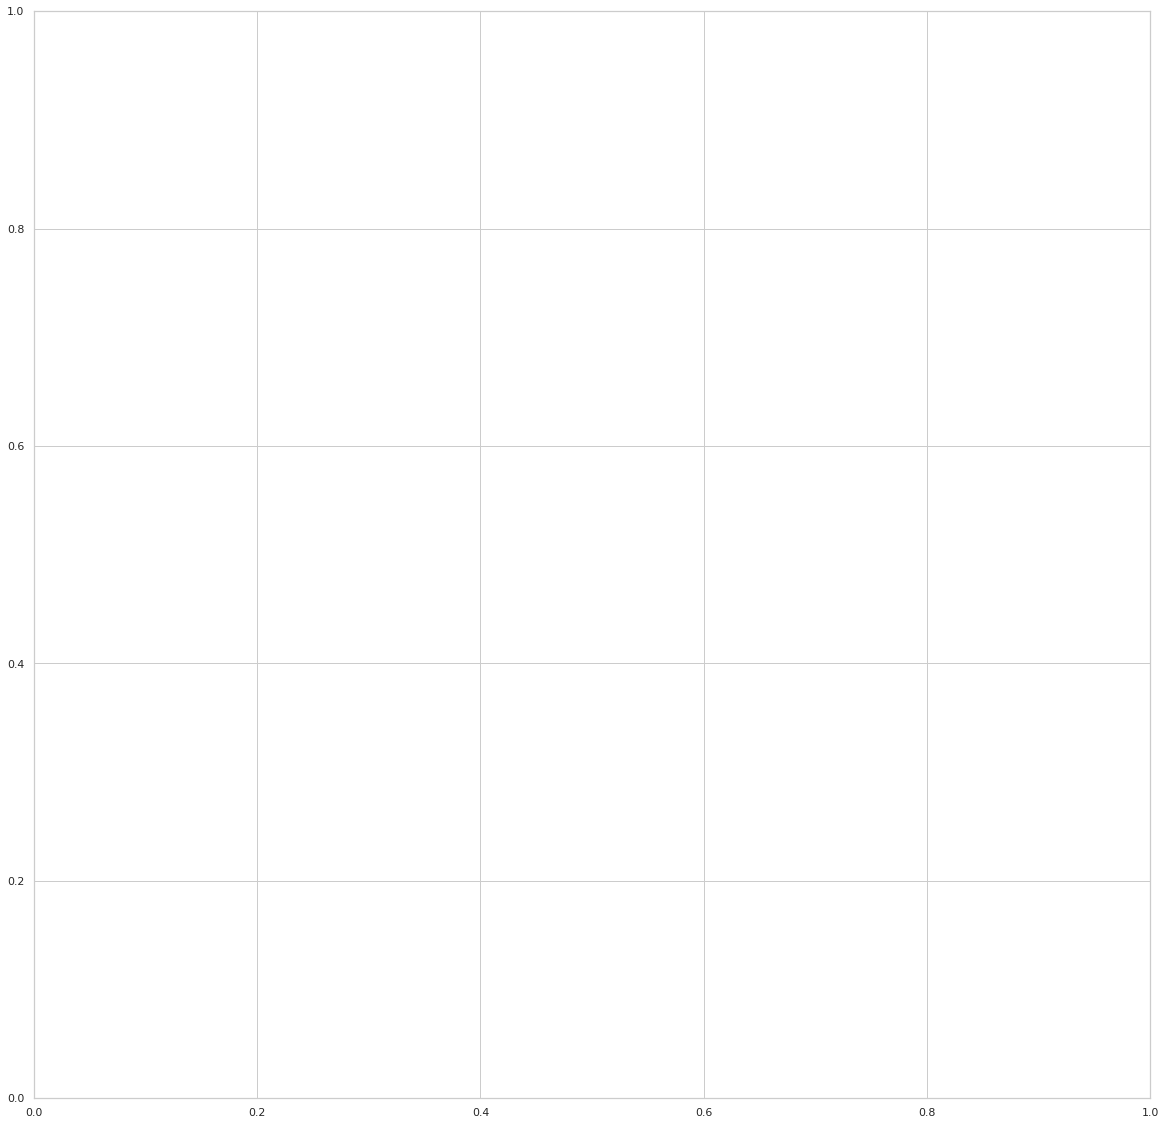

In [ ]:
def my_metrics(y_true, y_pred):
    accuracy=accuracy_score(y_true, y_pred)
    precision=precision_score(y_true, y_pred,average='weighted')
    f1Score=f1_score(y_true, y_pred, average='weighted') 
    print("Accuracy  : {}".format(accuracy))
    print("Precision : {}".format(precision))
    print("f1Score : {}".format(f1Score))
    cm=confusion_matrix(y_true, y_pred)
    print(cm)
    return accuracy, precision, f1Score

height=50; width=50
batch_size=20

test_datagen = ImageDataGenerator(rescale=1./255)

TESTING_DIR = '/content/drive/My Drive/Colab Notebooks/Coba/test'

test_generator = test_datagen.flow_from_directory(TESTING_DIR,
                                                  batch_size=batch_size,                                                             
                                                  target_size=(height, width),
                                                  class_mode= None,
                                                  shuffle=False
                                                  )

predictions = model.predict_generator(generator=test_generator)
yPredictions = predictions > 0.5
true_classes = test_generator.classes
class_names = test_generator.class_indices
Cmatrix_test = confusion_matrix(true_classes, yPredictions)

testAcc,testPrec, testFScore = my_metrics(true_classes, yPredictions)

plt.figure(figsize=(20,20))
ax= plt.subplot()
data = np.asarray(Cmatrix_test).reshape(3,3)
sns.heatmap(data,annot=True, fmt='',ax=ax, cmap=plt.cm.Reds)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(class_names)   
ax.yaxis.set_ticklabels(class_names)
plt.title('Confusion Matrix Test',fontsize=14)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(true_classes, yPredictions, target_names=class_names))

              precision    recall  f1-score   support

  Daun Jeruk       1.00      1.00      1.00        50
Daun Kemangi       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:

import numpy as np
from keras.models import load_model
model_path = '/content/drive/My Drive/Colab Notebooks/Coba/coba.h5''
model = load_model(model_path)

from google.colab import files
from keras.preprocessing import image
from tensorflow.keras.utils import load_img, img_to_array

uploaded=files.upload()

for fn in uploaded.keys():
 
  
  path= fn
  img=load_img(path, target_size=(100,100))
  
  x=img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=100)
  
  print(classes[0])
  
  if classes[0]>0:
    print(fn + " is a jeruk")
    
  else:
    print(fn + " is a belimbing")
 


SyntaxError: ignored